### 1. 对数据做数据探索分析（可参考0_EDA_ diabetes.ipynb，不计分） 

导入工具包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. 对数据做数据探索分析（可参考0_EDA_ diabetes.ipynb，不计分） 

In [2]:
train = pd.read_csv("pima-indians-diabetes.csv")
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
train.describe()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
NaN_col_names = ['Plasma_glucose_concentration', 'blood_pressure', 'Triceps_skin_fold_thickness', 'BMI']
print((train[NaN_col_names] == 0).sum())

Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
BMI                              11
dtype: int64


The number of target is 0: 500
The number of target is 1: 268


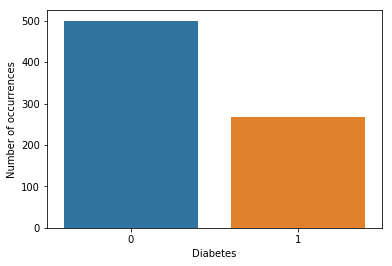

In [6]:
sns.countplot(train['Target'])
plt.xlabel('Diabetes')
plt.ylabel('Number of occurrences')
print("The number of target is 0:", (train['Target'] == 0).sum())
print("The number of target is 1:", (train['Target'] == 1).sum())

Text(0,0.5,'Number of occurrences')

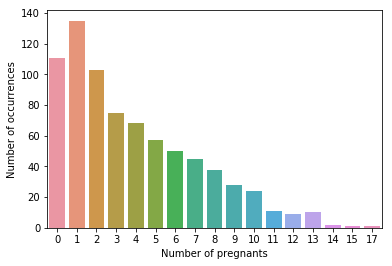

In [7]:
# 怀孕次数
fig = plt.figure()

sns.countplot(train['pregnants'])
plt.xlabel('Number of pregnants')
plt.ylabel('Number of occurrences')

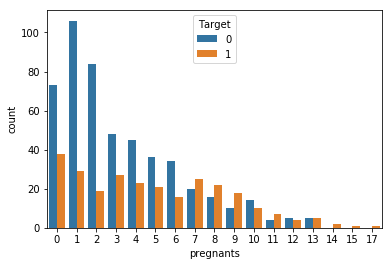

In [8]:
sns.countplot(x="pregnants", hue="Target", data=train)

Text(0,0.5,'Number of coccurrences')

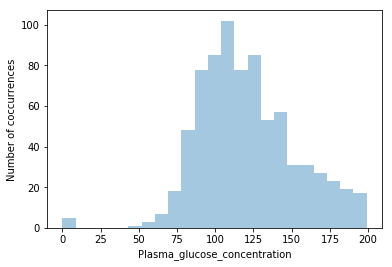

In [9]:
# 葡萄糖浓度
fig = plt.figure()
sns.distplot(train.Plasma_glucose_concentration, kde=False)
plt.xlabel('Plasma_glucose_concentration')
plt.ylabel('Number of coccurrences')

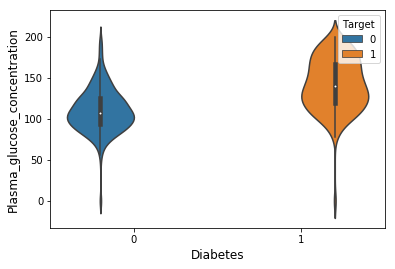

In [10]:
sns.violinplot(x='Target', y='Plasma_glucose_concentration', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Plasma_glucose_concentration', fontsize=12)
plt.show()

Text(0,0.5,'frequency')

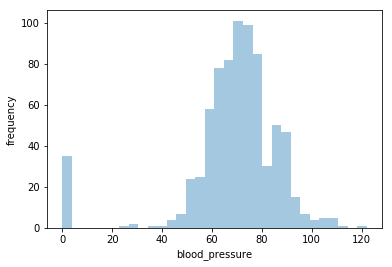

In [11]:
fig = plt.figure()
# kde核密度估计曲线
sns.distplot(train.blood_pressure, kde = False)
plt.xlabel('blood_pressure')
plt.ylabel('frequency')

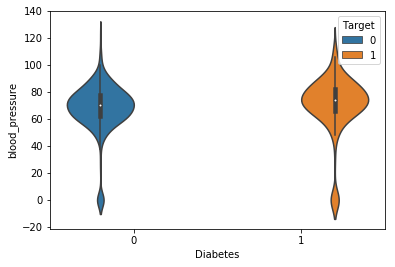

In [12]:
sns.violinplot(x='Target', y='blood_pressure', data=train, hue="Target")
plt.xlabel('Diabetes')
plt.ylabel('blood_pressure')
plt.show()

Text(0,0.5,'frequency')

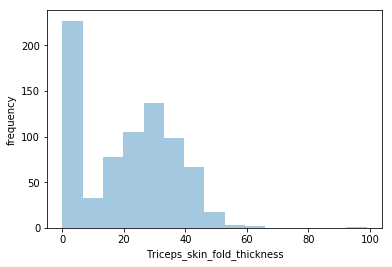

In [13]:
fig = plt.figure()
sns.distplot(train.Triceps_skin_fold_thickness, kde=False)
plt.xlabel('Triceps_skin_fold_thickness')
plt.ylabel('frequency')

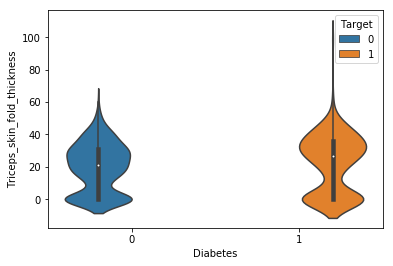

In [14]:
sns.violinplot(x="Target", y="Triceps_skin_fold_thickness", data=train, hue="Target")
plt.xlabel("Diabetes")
plt.ylabel("Triceps_skin_fold_thickness")
plt.show()

Text(0,0.5,'frequency')

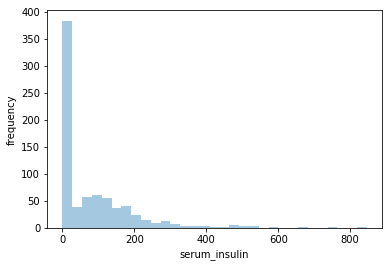

In [15]:
fig = plt.figure()
sns.distplot(train.serum_insulin, kde=False)
plt.xlabel('serum_insulin')
plt.ylabel('frequency')

Text(0,0.5,'serum_insulin')

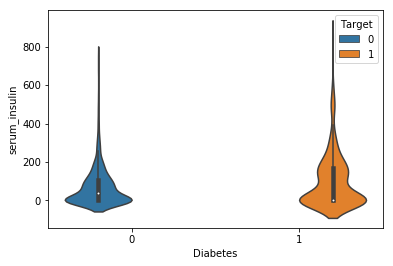

In [16]:
sns.violinplot(x="Target", y="serum_insulin", data=train, hue="Target")
plt.xlabel("Diabetes")
plt.ylabel("serum_insulin")

Text(0,0.5,'frequency')

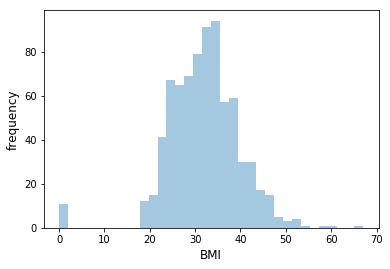

In [17]:
fig = plt.figure()
sns.distplot(train.BMI, kde=False)
plt.xlabel("BMI",fontsize=12)
plt.ylabel("frequency", fontsize=12)

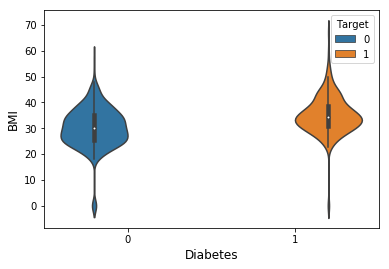

In [18]:
sns.violinplot(x="Target", y="BMI", data=train, hue="Target")
plt.xlabel("Diabetes",fontsize=12)
plt.ylabel("BMI",fontsize=12)
plt.show()

Text(0,0.5,'frequency')

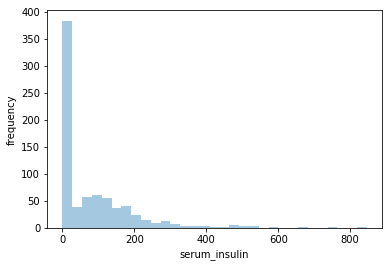

In [19]:
fig = plt.figure()
sns.distplot(train.serum_insulin, kde=False)
plt.xlabel('serum_insulin')
plt.ylabel('frequency')

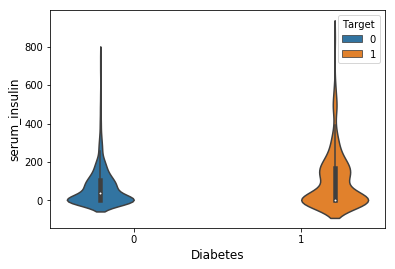

In [20]:
sns.violinplot(x='Target', y='serum_insulin', data=train, hue='Target')
plt.xlabel("Diabetes", fontsize=12)
plt.ylabel("serum_insulin", fontsize=12)
plt.show()

Text(0,0.5,'frequency')

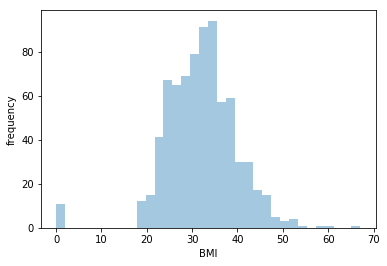

In [21]:
fig = plt.figure()
sns.distplot(train.BMI, kde=False)
plt.xlabel('BMI')
plt.ylabel('frequency')

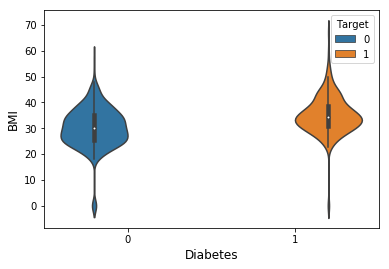

In [22]:
sns.violinplot(x='Target', y='BMI', data=train, hue='Target')
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

Target,0,1
BMI,,
0.0,9.0,2.0
18.2,3.0,0.0
18.4,1.0,0.0
19.1,1.0,0.0
19.3,1.0,0.0


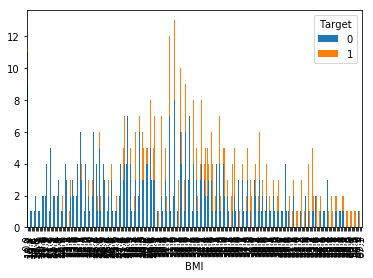

In [23]:
# groupby就是将("BMI""Target")两列数按"BMI"分组,然后将BMI的值进行统计。
# 如果BMI和Target相互独立，那么BMI在一个参数下有多个值，所以我们用unstack()将Target分层n列
# fillna(0)则是将Na变成了0
BMIDF = train.groupby(['BMI', 'Target'])['BMI'].count().unstack('Target').fillna(0)
# stacked的作用就是把多个参数垒起来
BMIDF[[0, 1]].plot(kind='bar', stacked=True)
train.groupby(['BMI', 'Target'])['BMI'].count().unstack('Target').fillna(0).head()

Text(0,0.5,'frequency')

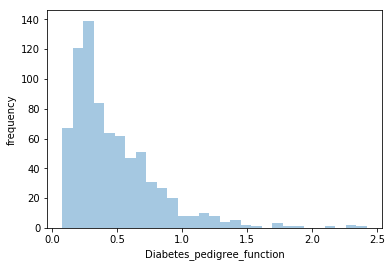

In [24]:
# diabetes_pedigree_function
fig = plt.figure()
sns.distplot(train.Diabetes_pedigree_function, kde = False)
plt.xlabel('Diabetes_pedigree_function')
plt.ylabel('frequency')

Target,0,1
Diabetes_pedigree_function,,
0.078,1.0,0.0
0.084,1.0,0.0
0.085,2.0,0.0
0.088,1.0,1.0
0.089,1.0,0.0


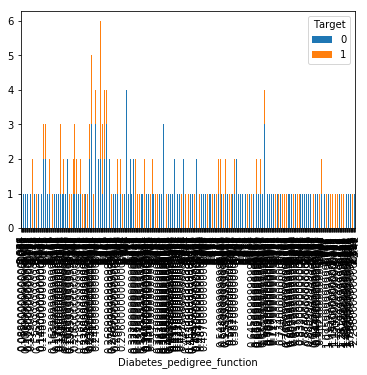

In [25]:
DF=train.groupby(['Diabetes_pedigree_function', 'Target'])['Diabetes_pedigree_function'].count().unstack('Target').fillna(0)
DF[[0, 1]].plot(kind='bar', stacked=True)
train.groupby(['Diabetes_pedigree_function', 'Target'])['Diabetes_pedigree_function'].count().unstack('Target').fillna(0).head()

Text(0,0.5,'frequency')

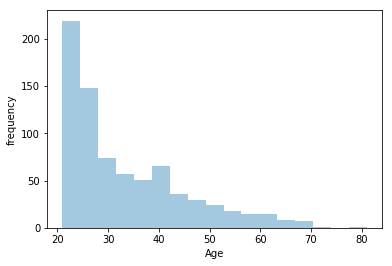

In [26]:
fig = plt.figure()
sns.distplot(train.Age, kde=False)
plt.xlabel('Age')
plt.ylabel('frequency')

Target,0,1
Age,,
21,58.0,5.0
22,61.0,11.0
23,31.0,7.0
24,38.0,8.0
25,34.0,14.0


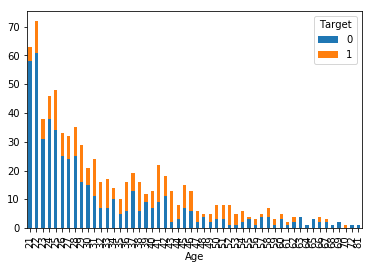

In [27]:
DF = train.groupby(['Age', 'Target'])['Age'].count().unstack('Target').fillna(0)
DF[[0, 1]].plot(kind='bar', stacked=True)
train.groupby(['Age', 'Target'])['Age'].count().unstack('Target').fillna(0).head()

特征之间的相关性

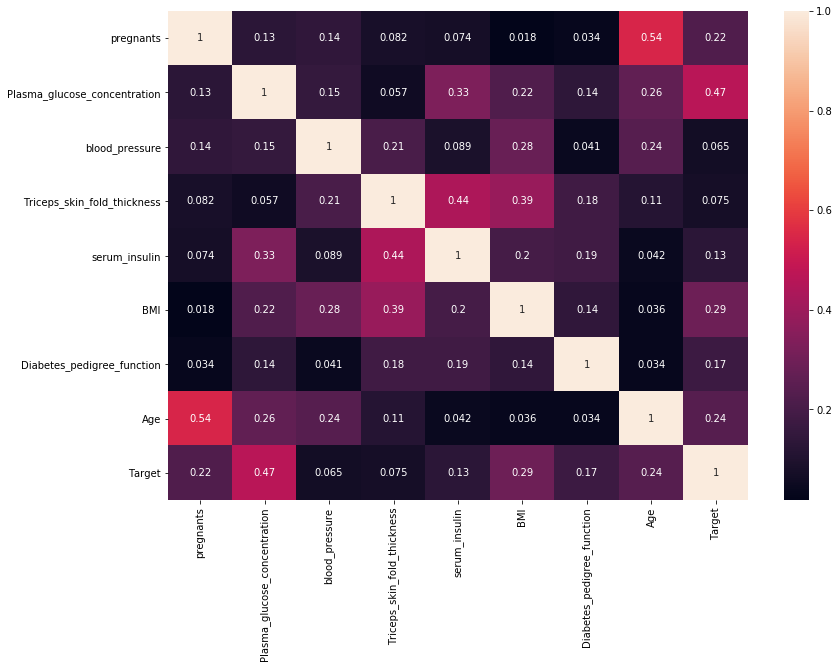

In [28]:
# corr()查看相关系数
# 利用subplot()函数可以返回一个axes的对象
data_corr = train.corr().abs()
plt.subplots(figsize=(13,9))
sns.heatmap(data_corr, annot=True)

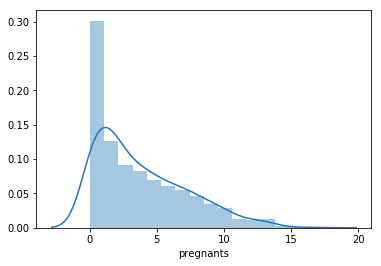

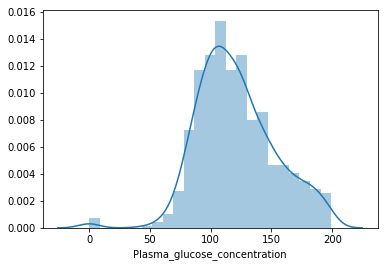

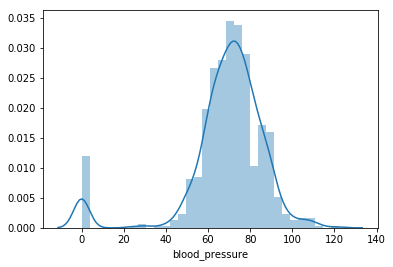

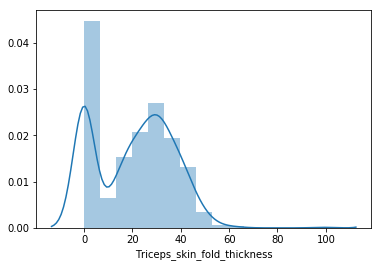

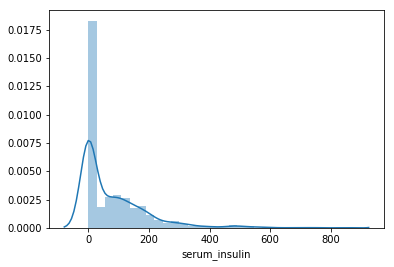

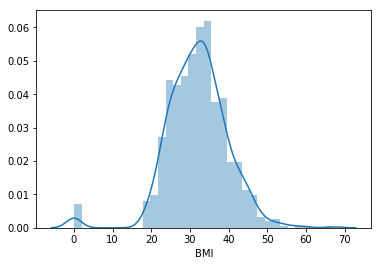

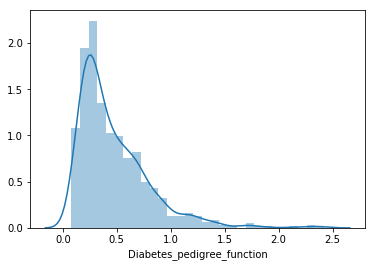

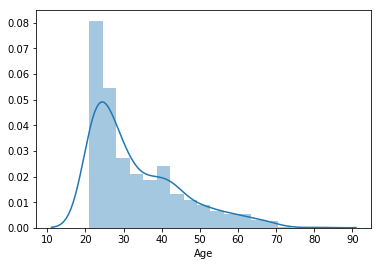

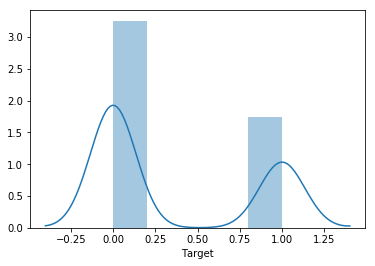

In [29]:
for feature in train.columns:
    sns.distplot(train[feature], kde=True)
    plt.show()

### 2. 适当的特征工程（可参考1_FE_ diabetes.ipynb，不计分）

In [30]:
NaN_col_names = ['Plasma_glucose_concentration', 'blood_pressure', 'Triceps_skin_fold_thickness', 'serum_insulin', 'BMI']
train[NaN_col_names] = train[NaN_col_names].replace(0, np.NaN)
print(train.isnull().sum())

pregnants                         0
Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
Diabetes_pedigree_function        0
Age                               0
Target                            0
dtype: int64


In [31]:
medians = train.median()
train = train.fillna(medians)
print(train.isnull().sum())

pregnants                       0
Plasma_glucose_concentration    0
blood_pressure                  0
Triceps_skin_fold_thickness     0
serum_insulin                   0
BMI                             0
Diabetes_pedigree_function      0
Age                             0
Target                          0
dtype: int64


### 3. 采用5折交叉验证，分别用log似然损失和正确率，对Logistic回归模型的正则超参数调优。（各50分）

数据标准化

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

y_train = train['Target']
X_train = train.drop(["Target"], axis=1)
# 保存特征工程后的结果
feat_names = X_train.columns
# 初始化特征的标准化器
ss_X = StandardScaler()
# 分别对训练和测试数据进行标准化处理
X_train = ss_X.fit_transform(X_train)
# 将StandScaler训练后的数据进行表格化，行为feat_names，列为X_train
X_train = pd.DataFrame(columns=feat_names, data=X_train)
# axis=0代表往跨行（down)，而axis=1代表跨列
train = pd.concat([X_train, y_train], axis=1)
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


默认参数的LogisticRegression回归

In [33]:
# 将Logistic回归进行实例化
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
# 分类任务中交叉验证默认值为是采用StratifiedKFold（分层交叉验证）
from sklearn.model_selection import cross_val_score
# 损失函数是用来衡量模型好坏的一个标准，通常希望模型有比较小的loss
Loss = cross_val_score(Lr, X_train, y_train, cv=5, scoring='neg_log_loss')
# 5折交叉验证的内容和他的平均数
print('Logloss of each fold is:', -Loss)
print('CV logloss is:', -Loss.mean())

Logloss of each fold is: [0.48797856 0.53011593 0.4562292  0.422546   0.48392885]
CV logloss is: 0.47615970944434044


正则化的Logistic_Regression及参数调优

In [34]:
# LogisticRegression和GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# 设置调优参数
penaltys = ['l1', 'l2']
Cs = [0.1, 1, 10, 100, 1000]
# 形成调参网格
tuned_parameters = dict(penalty = penaltys, C=Cs)
# 学习器：优化器liblinear   分类默认为Ovr
Lr_penalty = LogisticRegression(solver='liblinear')
# 生成GridSearchCV的实例， tuned_parameters调优参数，
grid = GridSearchCV(Lr_penalty, tuned_parameters, cv=5, scoring='neg_log_loss', n_jobs=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [35]:
# 最佳参数的分数
print('最佳参数为：{}\n其对应的分数是:{}'.format(grid.best_params_,-grid.best_score_))

最佳参数为：{'C': 1, 'penalty': 'l1'}
其对应的分数是:0.4760260514543165
